<a href="https://www.kaggle.com/code/risakashiwabara/makeup-analysis-pie-chart-value-count-data?scriptVersionId=215115466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/QdzccyfF/gahag-0116277904-1.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, kurtosis
import warnings

from sklearn.preprocessing import LabelEncoder
# from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from tqdm.auto import tqdm
import catboost as cb
import plotly.figure_factory as ff

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/QdzccyfF/gahag-0116277904-1.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Sample data acquisition</p>

In [2]:
data = pd.read_csv('/kaggle/input/makeup-shades-dataset/shades.csv')
data

,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2
...,...,...,...,...,...,...,...,...,...,...
620,L'Oréal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85,7
621,L'Oréal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83,7
622,L'Oréal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85,7
623,L'Oréal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82,7


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/QdzccyfF/gahag-0116277904-1.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">-Details-</p>

<Axes: >

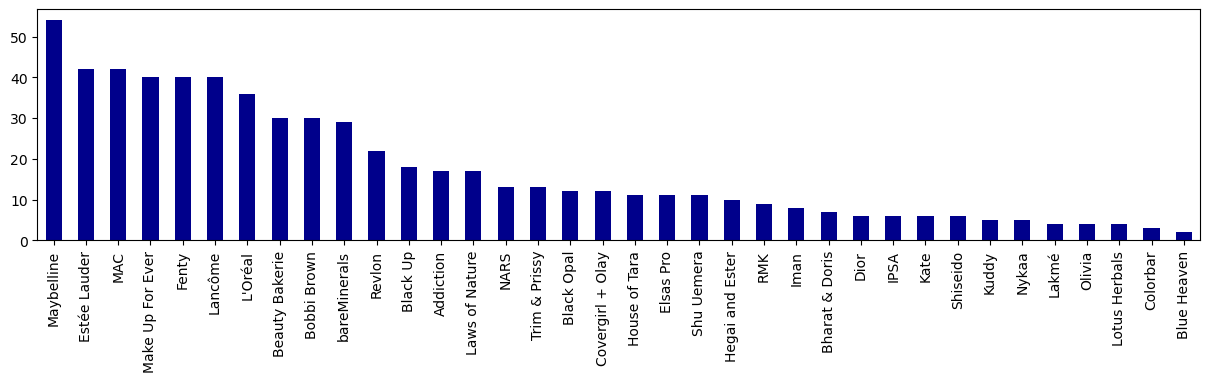

In [3]:
data['brand'].value_counts().plot.bar(figsize=(15, 3), color='darkblue')

In [4]:
data_name = data['brand'].value_counts()
df = pd.DataFrame(data_name)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/QdzccyfF/gahag-0116277904-1.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">brand</p>

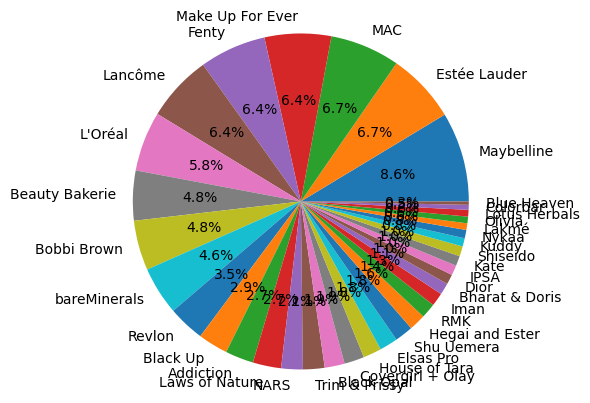

In [5]:
# Year of Month でインデックスする
sizes = df['brand']
labels =  df.index.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/QdzccyfF/gahag-0116277904-1.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Foundation</p>

-----H-----


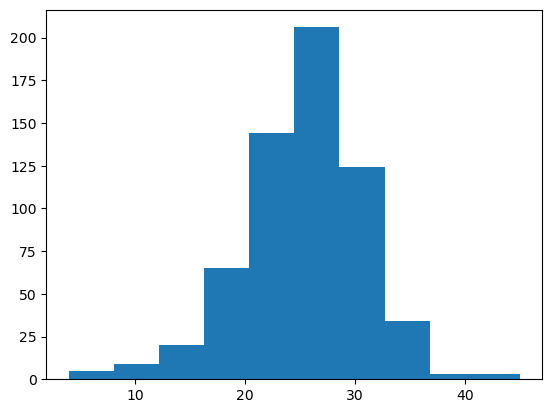

-----S-----


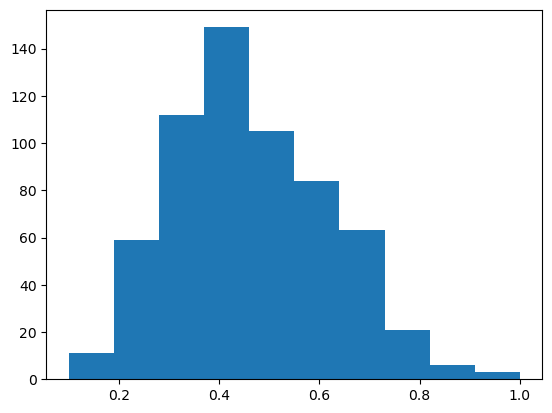

-----V-----


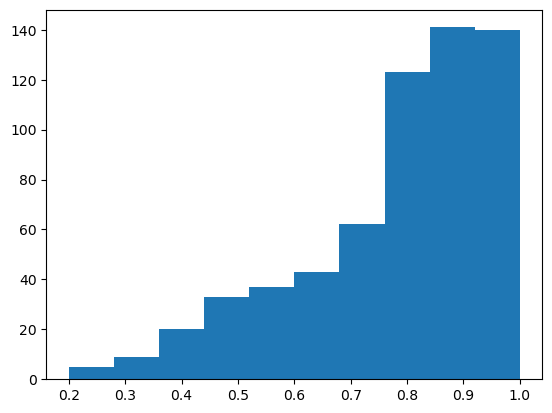

-----L-----


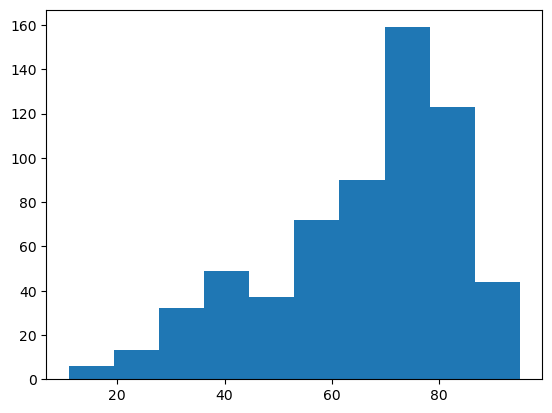

In [6]:
colums = ['H','S','V','L']
for colum in colums:
    x = data[colum]
    print('-----'+colum+'-----')
    plt.hist(x)
    plt.show()
   

In [7]:
multi_df = data.set_index(["group", "brand"])
df = multi_df.reset_index()
df

,group,brand,brand_short,product,product_short,hex,H,S,V,L
0,2,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86
1,2,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92
2,2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91
3,2,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88
4,2,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65
...,...,...,...,...,...,...,...,...,...,...
620,7,L'Oréal,lo,True Match,tms,eecfba,24.0,0.22,0.93,85
621,7,L'Oréal,lo,True Match,tms,e8c7b8,19.0,0.21,0.91,83
622,7,L'Oréal,lo,True Match,tms,f0cbb9,20.0,0.23,0.94,85
623,7,L'Oréal,lo,True Match,tms,e9c4b1,20.0,0.24,0.91,82


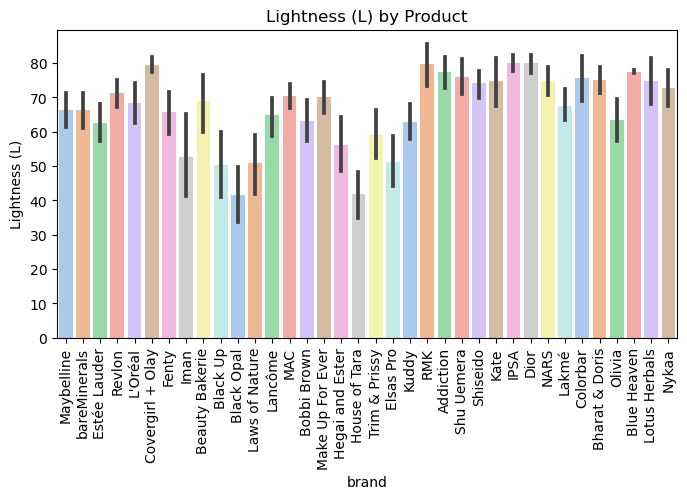

In [8]:
# ブランドの明度（L）分布を棒グラフで表示
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='brand', y='L', palette='pastel')
plt.title('Lightness (L) by Product')
plt.xlabel('brand')
plt.ylabel('Lightness (L)')
plt.xticks(rotation=90)
plt.show()
